# Introduction

The goal of the Hospital Management SQL Project is to completely transform how our organization handles patient data. This project aims to maximize hospital operations and patient care by rethinking the way information is stored, accessed, and used in an increasingly data-centric world. A complex database structure must be carefully designed and implemented to achieve this goal. It includes linking tables for patients, employees, departments and other relevant information. Establishing a solid relational database structure that meets present requirements and is expandable for future expansion is the aim. The project demonstrates working with SQL databases like `MySQL`, and data warehouses like `AWS RDS’.

One of the most important skills for data analysis is interacting with databases. The database is split into separate tables which represent different logical objects. For example, all the patients are in the patient’s database. Each table has a set of fields, which define the attributes of the table, and rows, which store the actual data. Relationships between tables are represented by special fields called foreign keys. The logical diagram of the project which is mainly the Entity-Relationship Diagram as well as the Relational Diagram is depicted in the report.
Once the database in created, we have used DDL statements to create Tables and we have inserted dummy data into the respective tables. Finally, we have prepared a set of analytic questions to test the database using SQL statements.
We have then deployed the database on AWS and then prepared a Dashboard for the same.


**Entity Relationship Diagram**

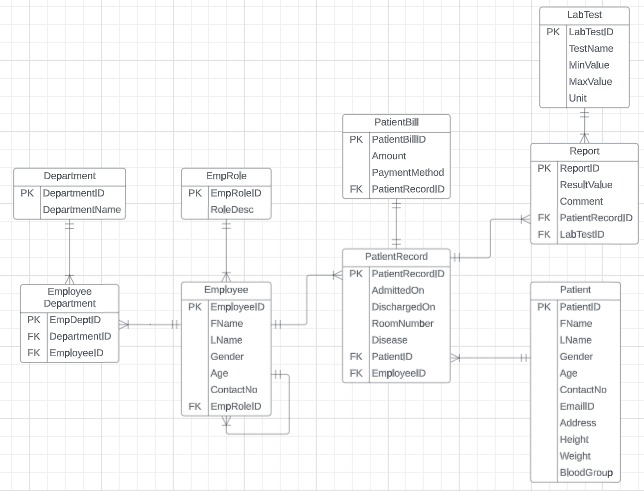

In [1]:
import sys
!pip install pandas
!pip install numpy
!pip install datapane
!pip install plotly
!pip install pymysql
!pip install mysql

In [2]:
# import sqlite3
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import datapane as dp
import matplotlib.pyplot as plt
import pymysql
import warnings
import pymysql
import sys
import os

warnings.filterwarnings('ignore')



In [3]:
host = 'hospitaldb.c1kwxox9gp12.us-east-2.rds.amazonaws.com'
user = 'aka'
password = 'akaedm202'
database = 'hospitaldbms2'

connection = pymysql.connect(host=host, user=user, passwd=password, database=database)
with connection:
    cur = connection.cursor()
    cur.execute("SELECT VERSION()")
    version = cur.fetchone()
    print("Database version: {} ".format(version[0]))

Database version: 8.0.33 


In [4]:

def run_query(q: str) -> pd.DataFrame:
    with pymysql.connect(host=host, user=user, passwd=password, database=database) as conn:
        return pd.read_sql(q, conn)


def run_command(c: str):
    with pymysql.connect(host=host, user=user, passwd=password, database=database) as conn:
        conn.isolation_level = None
        conn.execute(c)

In [5]:
def show_tables() -> pd.DataFrame:
    q = """
          SELECT table_name
          FROM information_schema.tables
          WHERE table_schema = 'hospitaldbms2' AND table_type = 'BASE TABLE';
        """
    return run_query(q)

def get_table_row_count(tablename) -> int:
    q = (
        """
        SELECT
            COUNT(1)
        FROM %s;
        """
        % tablename
    )
    return run_query(q)["COUNT(1)"][0]


tables = show_tables()
tables["row_count"] = [get_table_row_count(t) for t in tables['TABLE_NAME']]

tables

,TABLE_NAME,row_count
0,department,10
1,employee,10
2,employeedepartment,10
3,employeerole,10
4,labtest,10
5,patient,72
6,patientbill,61
7,patientrecord,71
8,report,51


**1.	How many times has a patient visited the hospital.**


In [6]:
import datapane as dp

number_of_Times_visited = """
SELECT
    p.PatientID,
    p.FName,
    p.LName,
    p.Gender,
    p.Age,
    p.ContactNo,
    p.EmailID,
    p.Address,
    p.Height,
    p.Weight,
    p.BloodGroup,
    COUNT(pr.PatientRecordID) AS VisitCount
FROM
    hospitaldbms2.patient p
JOIN
    hospitaldbms2.patientrecord pr ON p.PatientID = pr.PatientID
GROUP BY
    p.PatientID
ORDER BY
    VisitCount DESC;
"""

times = run_query(number_of_Times_visited)

dp.DataTable(times)

We start by selecting the columns we want to see in the output. Since these come from four different tables (track, album, artist, invoice_line), we need to join the tables on the foreign key relationships — check the schema to see what is possible.

Next we group by the track name, order by the most purchases and only select the top 10 results.
Running the query gives us a pandas dataframe, which we then wrap in a DataTable block.

**2.	What is the total amount billed by a particular patient throughout his/her visits.**

In [7]:
total_amount_billed = """
SELECT
    p.PatientID,
    p.FName,
    p.LName,
    p.Gender,
    p.Age,
    p.ContactNo,
    p.EmailID,
    p.Address,
    p.Height,
    p.Weight,
    p.BloodGroup,
    SUM(pb.Amount) AS TotalAmountBilled
FROM
    hospitaldbms2.patientbill pb
JOIN
    hospitaldbms2.patientrecord pr ON pb.PatientRecordID = pr.PatientRecordID
JOIN
    hospitaldbms2.patient p ON pr.PatientID = p.PatientID
GROUP BY
    p.PatientID
ORDER BY
    TotalAmountBilled DESC;
"""

run_query(total_amount_billed)

,PatientID,FName,LName,Gender,Age,ContactNo,EmailID,Address,Height,Weight,BloodGroup,TotalAmountBilled
0,500,John,Smith,Male,70,123-456-7890,john.smith@example.com,123 Elder Street,170 cm,75 kg,A+,9302.300049
1,560,Samuel,Hunter,Male,75,555-123-4567,samuel.hunter@example.com,456 Cedar Circle,165 cm,74 kg,A-,8401.300049
2,554,Henry,Simpson,Male,70,999-888-7777,henry.simpson@example.com,101 Maple Circle,180 cm,85 kg,AB+,7501.950195
3,558,Frank,Wells,Male,80,123-456-7890,frank.wells@example.com,890 Oak Avenue,175 cm,80 kg,A-,7101.699951
4,556,Albert,Barnes,Male,75,222-333-4444,albert.barnes@example.com,567 Pine Circle,160 cm,75 kg,O-,7001.400024
5,559,Clara,Matthews,Female,68,987-654-3210,clara.matthews@example.com,123 Maple Lane,160 cm,78 kg,B+,7001.050049
6,555,Evelyn,Harrison,Female,72,666-777-8888,evelyn.harrison@example.com,234 Elm Lane,155 cm,68 kg,B+,6802.400146
7,570,Leonard,Newton,Male,63,111-222-3333,leonard.newton@example.com,789 Pine Lane,160 cm,78 kg,A+,6401.000000
8,561,Mabel,Watson,Female,72,666-777-8888,mabel.watson@example.com,789 Elm Street,170 cm,68 kg,B+,6001.500000
9,564,Oscar,Bryant,Male,76,444-555-6666,oscar.bryant@example.com,456 Oak Lane,180 cm,85 kg,B-,6001.200195


**3.	What is the most preferred payment method.**

In [8]:
payment_type = """
SELECT
    PaymentMethod,
    COUNT(PatientBillID) AS PaymentCount
FROM
    hospitaldbms2.patientbill
GROUP BY
    PaymentMethod
ORDER BY
    PaymentCount DESC;
"""

run_query(payment_type)

country_metrics = run_query(payment_type)

sales_breakdown = go.Figure(
    data=[go.Pie(labels=country_metrics["PaymentMethod"], values=country_metrics["PaymentCount"], hole=0.3)]
)

sales_breakdown.update_layout(title_text="Most Prefered Payment Method")

sales_breakdown.show()

**4.	What is the amount spent per age group on hospital bills.**

In [9]:
payment_type = """
WITH AgeGroups AS (
    SELECT
        CASE
            WHEN Age BETWEEN 0 AND 18 THEN '0-18'
            WHEN Age BETWEEN 19 AND 30 THEN '19-30'
            WHEN Age BETWEEN 31 AND 45 THEN '31-45'
            WHEN Age BETWEEN 46 AND 60 THEN '46-60'
            ELSE '61+'
        END AS AgeGroup,
        PatientID
    FROM
        hospitaldbms2.patient
)

SELECT
    ag.AgeGroup,
    SUM(pb.Amount) AS TotalAmountBilled
FROM
    AgeGroups ag
JOIN
    hospitaldbms2.patientrecord pr ON ag.PatientID = pr.PatientID
JOIN
    hospitaldbms2.patientbill pb ON pr.PatientRecordID = pb.PatientRecordID
GROUP BY
    ag.AgeGroup
ORDER BY
    TotalAmountBilled DESC;
"""
run_query(payment_type)

,AgeGroup,TotalAmountBilled
0,61+,119828.250977
1,46-60,10303.250000
2,19-30,1200.800049


**5.	What is the count of visits in hospital for a particular age group.**

In [26]:
visits = """
WITH AgeGroups AS (
    SELECT
        CASE
            WHEN Age BETWEEN 0 AND 18 THEN '0-18'
            WHEN Age BETWEEN 19 AND 30 THEN '19-30'
            WHEN Age BETWEEN 31 AND 45 THEN '31-45'
            WHEN Age BETWEEN 46 AND 60 THEN '46-60'
            ELSE '61+'
        END AS AgeGroup,
        PatientID
    FROM
        hospitaldbms.patient
)

SELECT
    ag.AgeGroup,
    COUNT(pr.PatientRecordID) AS VisitCount
FROM
    AgeGroups ag
JOIN
    hospitaldbms.patientrecord pr ON ag.PatientID = pr.PatientID
GROUP BY
    ag.AgeGroup
ORDER BY
    VisitCount DESC;
"""

no_of_visits = run_query(visits)
no_of_visits.sort_values("AgeGroup", inplace=True)

plot = px.bar(
    no_of_visits,
    y="AgeGroup",
    x="VisitCount",
    orientation="h",
    text="AgeGroup",
    title="Count of Visits in Hospital for a particular age group",
)

plot.show()

**6.	Who are the top 5 hardworking employees who treated maximum patients.**

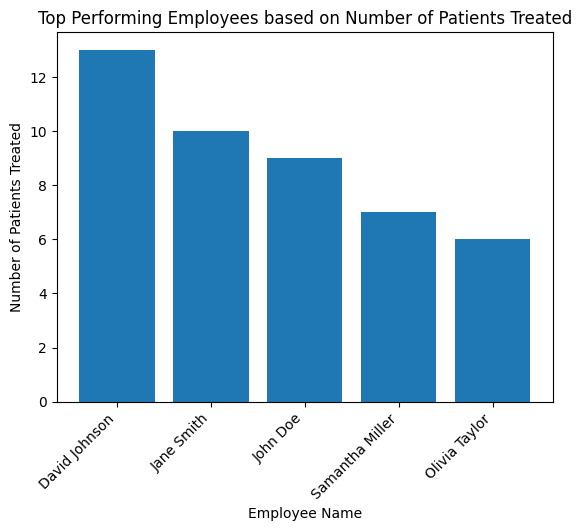

In [11]:
employee = """
SELECT
    e.EmployeeID,
    e.FName,
    e.LName,
    er.RoleDescription AS EmployeeRole,
    COUNT(pr.PatientID) AS PatientsTreated
FROM
    hospitaldbms2.employee e
JOIN
    hospitaldbms2.patientrecord pr ON e.EmployeeID = pr.EmployeeID
JOIN
    hospitaldbms2.employeerole er ON e.EmpRoleID = er.EmpRoleID
GROUP BY
    e.EmployeeID
ORDER BY
    PatientsTreated DESC
LIMIT 5;
"""
run_query(employee)

query = """
    SELECT e.EmployeeID, CONCAT(e.FName, ' ', e.LName) AS EmployeeName, COUNT(pr.PatientID) AS PatientsTreated
    FROM employee e
    LEFT JOIN patientrecord pr ON e.EmployeeID = pr.EmployeeID
    GROUP BY e.EmployeeID, EmployeeName
    ORDER BY PatientsTreated DESC
    LIMIT 5;
"""

df = run_query(query)


plt.bar(df['EmployeeName'], df['PatientsTreated'])
plt.xlabel('Employee Name')
plt.ylabel('Number of Patients Treated')
plt.title('Top Performing Employees based on Number of Patients Treated')
plt.xticks(rotation=45, ha='right')
plt.show()

**7.	Which patients underwent the maximum number of lab tests.**

In [12]:
countlabtest = """
SELECT
    pr.PatientID,
    p.FName,
    p.LName,
    COUNT(rt.LabTestID) AS LabTestsCount
FROM
    hospitaldbms2.patientrecord pr
JOIN
    hospitaldbms2.report rt ON pr.PatientRecordID = rt.PatientRecordID
JOIN
    hospitaldbms2.patient p ON pr.PatientID = p.PatientID
GROUP BY
    pr.PatientID
ORDER BY
    LabTestsCount DESC;
"""
run_query(countlabtest)

,PatientID,FName,LName,LabTestsCount
0,501,Mary,Johnson,3
1,500,John,Smith,3
2,551,Eleanor,Baker,3
3,570,Leonard,Newton,2
4,569,Ruby,Reynolds,2
5,568,Max,Ferguson,2
6,567,Eva,Fletcher,2
7,566,Hugo,Harvey,2
8,565,Lillian,Carter,2
9,564,Oscar,Bryant,2


**8.	What is the number of Lab tests performed by patients based on their age group.**

In [13]:
labtest = """
WITH AgeGroups AS (
    SELECT
        CASE
            WHEN Age BETWEEN 0 AND 18 THEN '0-18'
            WHEN Age BETWEEN 19 AND 30 THEN '19-30'
            WHEN Age BETWEEN 31 AND 45 THEN '31-45'
            WHEN Age BETWEEN 46 AND 60 THEN '46-60'
            ELSE '61+'
        END AS AgeGroup,
        PatientID
    FROM
        hospitaldbms2.patient
)

SELECT
    ag.AgeGroup,
    COUNT(rt.LabTestID) AS LabTestsCount
FROM
    AgeGroups ag
JOIN
    hospitaldbms2.patientrecord pr ON ag.PatientID = pr.PatientID
JOIN
    hospitaldbms2.report rt ON pr.PatientRecordID = rt.PatientRecordID
JOIN
    hospitaldbms2.patient p ON pr.PatientID = p.PatientID
GROUP BY
    ag.AgeGroup
ORDER BY
    LabTestsCount DESC;
"""
run_query(labtest)

,AgeGroup,LabTestsCount
0,61+,44
1,46-60,5
2,19-30,2
